🌟 Exercise 1 : What Are Large Language Models (LLMs)?

1. Explain with your words what are LLMs and what they are designed for.

Large Language Models (LLMs) are powerful NLP models based on the Transformer architecture, which uses self-attention to understand and generate human language. Unlike earlier models designed for specific tasks, LLMs are trained on vast amounts of text to perform a wide range of language-related tasks—including translation, summarization, question answering, and conversation—often without needing task-specific tuning.

2. One popular LLMs is GPT (Generative Pretrained Transformer) which is known for powerful text generation capabilities. We will implement it. Copy/Paste this code to a colab notebook:

In [2]:
# Install necessary libraries
!pip install transformers matplotlib --quiet

# Import required libraries
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

3. Now, we want to load a pretrained model and a tokeniner, fill in this partial code :


In [8]:
# 2. Loading a pretrained model and tokenizer
#from transformers import GPT2Model, GPT2Tokenizer

model_name =  "openai-community/gpt2"# GPT-2 is used here for demonstration; can be replaced with models like "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

print(f"\nModel '{model_name}' loaded successfully!")
print("""
GPT-2 is a causal language model, meaning it predicts the next word in a sequence.
It has been trained on a diverse dataset and can generate coherent, contextually relevant text.
""")

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]


Model 'openai-community/gpt2' loaded successfully!

GPT-2 is a causal language model, meaning it predicts the next word in a sequence. 
It has been trained on a diverse dataset and can generate coherent, contextually relevant text.



🌟 Exercise 2 : Transformer Architecture And Tokenization

Explain with your own words the process of tokenization. Create a new variable text that the sentence of your choice.
Tokenize the input text
Visualize the tokenisation process.

Original Text: Tokenization is the process of transforming a raw text input into a sequence of discrete tokens, where each token is a unique, identifiable unit—often a word, subword, or character—that the language model can process.
This involves encoding the text by quantifying its linguistic features within the context of the tokenizer’s vocabulary and segmentation strategy, enabling efficient and meaningful input representation for downstream tasks.
Tokens: ['Token', 'ization', 'Ġis', 'Ġthe', 'Ġprocess', 'Ġof', 'Ġtransforming', 'Ġa', 'Ġraw', 'Ġtext', 'Ġinput', 'Ġinto', 'Ġa', 'Ġsequence', 'Ġof', 'Ġdiscrete', 'Ġtokens', ',', 'Ġwhere', 'Ġeach', 'Ġtoken', 'Ġis', 'Ġa', 'Ġunique', ',', 'Ġidentifiable', 'Ġunit', 'âĢĶ', 'often', 'Ġa', 'Ġword', ',', 'Ġsub', 'word', ',', 'Ġor', 'Ġcharacter', 'âĢĶ', 'that', 'Ġthe', 'Ġlanguage', 'Ġmodel', 'Ġcan', 'Ġprocess', '.', 'Ċ', 'This', 'Ġinvolves', 'Ġencoding', 'Ġthe', 'Ġtext', 'Ġby', 'Ġquant', 'ifying', 'Ġits', 'Ġlinguistic', 'Ġfeatures', 'Ġwithin', 'Ġt

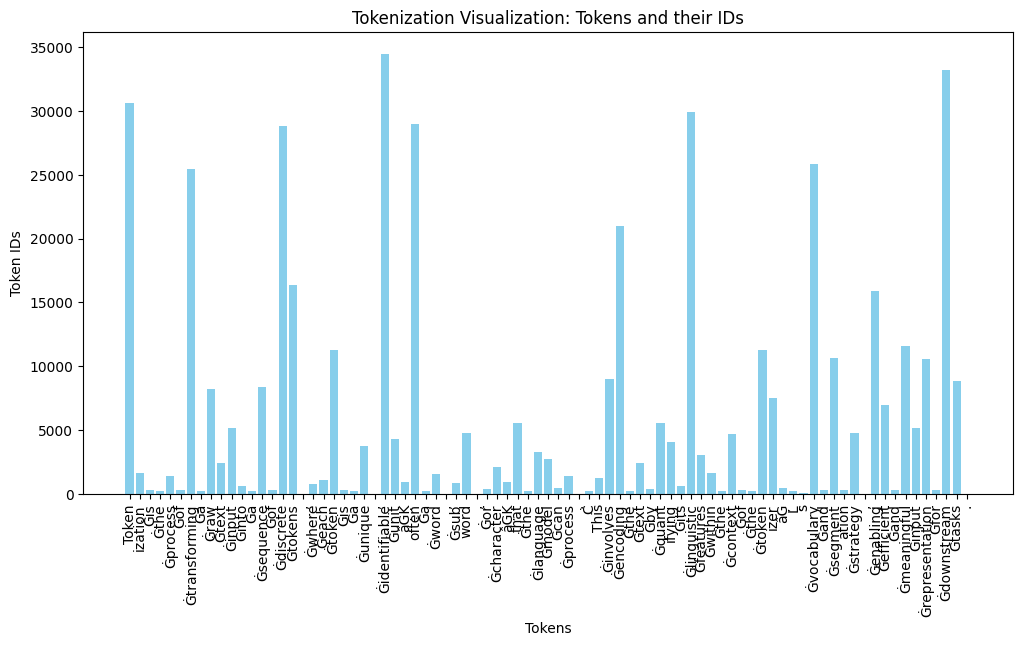

In [9]:
# 2. Tokenize input text
text = """Tokenization is the process of transforming a raw text input into a sequence of discrete tokens, where each token is a unique, identifiable unit—often a word, subword, or character—that the language model can process.
This involves encoding the text by quantifying its linguistic features within the context of the tokenizer’s vocabulary and segmentation strategy, enabling efficient and meaningful input representation for downstream tasks."""
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f"Original Text: {text}")
print(f"Tokens: {tokens}")
print(f"Token IDs: {token_ids}")

# 3. Visualizing the tokenization process
plt.figure(figsize=(12, 6))
plt.bar(range(len(tokens)), token_ids, color="skyblue")
plt.xticks(range(len(tokens)), tokens, rotation=90)
plt.xlabel("Tokens")
plt.ylabel("Token IDs")
plt.title("Tokenization Visualization: Tokens and their IDs")
plt.show()

Exercise 3 : Understanding Token IDs And Special Prefixes

Print the ID of each tokens from text
What does special prefixes like ‘Ġ’ indicate ?

In [6]:
print(token_ids)
# ‘Ġ’ is for "space".

[30642, 1634, 318, 262, 1429, 286, 25449, 257, 8246, 2420, 5128, 656, 257, 8379, 286, 28810, 16326, 11, 810, 1123, 11241, 318, 257, 3748, 11, 34450, 4326, 960, 28950, 257, 1573, 11, 850, 4775, 11, 393, 2095, 960, 5562, 262, 3303, 2746, 460, 1429, 13, 198, 1212, 9018, 21004, 262, 2420, 416, 5554, 4035, 663, 29929, 3033, 1626, 262, 4732, 286, 262, 11241, 7509, 447, 247, 82, 25818, 290, 10618, 341, 4811, 11, 15882, 6942, 290, 11570, 5128, 10552, 329, 33218, 8861, 13]


🌟 Exercise 4 : Pretraining Vs. Fine-Tuning

Explain with your own words the two phases of Pretraining and FineTuning in Transformers.

Pretraining is where the model learns the fundamentals of language by being exposed to massive amounts of general-purpose text. It's not taught specific tasks — instead, it learns patterns, structure, grammar, semantics, and even some reasoning just by predicting or filling in text.

Fine-tuning is where the pretrained model is adapted to a specific task (like summarization, sentiment analysis, or legal QA). Here, it's not learning "language" anymore — it's learning how to apply its language skills to get a desired type of output.

🌟 Exercise 5 : Generate Simple Text

Create a variable text with the sentence of your choice (another one)
The model generates text by predicting the next word sequentially, based on the given input text (prompt). Generate output using the model.

In [10]:
input_text= "I feel unsure of what is expected of this part. It ain't like I actually requested a task!"
input_ids= tokenizer.encode(input_text, return_tensors="pt")
output_ids = model.generate(input_ids, max_length=50, num_return_sequences=1)
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print(f"Input: {input_text}")
print(f"Generated Output: {output_text}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Input: I feel unsure of what is expected of this part. It ain't like I actually requested a task!
Generated Output: I feel unsure of what is expected of this part. It ain't like I actually requested a task! I'm just trying to figure out what I'm supposed to do. I'm not sure if I'm supposed to do anything, but I'm
